# Linear Programming With Python 

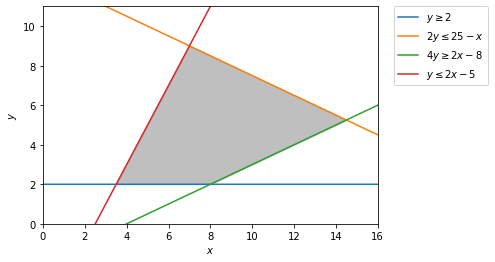

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Construct lines
# x > 0
x = np.linspace(0, 20, 2000)
# y >= 2
y1 = (x*0) + 2
# 2y <= 25 - x
y2 = (25-x)/2.0
# 4y >= 2x - 8 
y3 = (2*x-8)/4.0
# y <= 2x - 5 
y4 = 2 * x -5

# Make plot
plt.plot(x, y1, label=r'$y\geq2$')
plt.plot(x, y2, label=r'$2y\leq25-x$')
plt.plot(x, y3, label=r'$4y\geq 2x - 8$')
plt.plot(x, y4, label=r'$y\leq 2x-5$')
plt.xlim((0, 16))
plt.ylim((0, 11))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# Fill feasible region
y5 = np.minimum(y2, y4)
y6 = np.maximum(y1, y3)
plt.fill_between(x, y5, y6, where=y5>y6, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Introduction to Linear Programming with Python - Part 2
Introduction to PuLP
PuLP is an open source linear programming package for python. PuLP can be installed using pip, instructions here.

In this notebook, we'll explore how to construct and solve the linear programming problem described in Part 1 using PuLP.

A brief reminder of our linear programming problem:

We want to find the maximum solution to the objective function:

Z = 4x + 3y

Subject to the following constraints:

x ≥ 0
y ≥ 2
2y ≤ 25 - x
4y ≥ 2x - 8
y ≤ 2x - 5

We'll begin by importing PuLP

In [4]:
pip install pulp

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pulp

In [7]:
my_lp_problem = pulp.LpProblem("My LP Problem", pulp.LpMaximize)

C:\Users\kadir\anaconda3\lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [8]:
x = pulp.LpVariable('x', lowBound=0, cat='Continuous')
y = pulp.LpVariable('y', lowBound=2, cat='Continuous')

In [9]:
# Objective function
my_lp_problem += 4 * x + 3 * y, "Z"

# Constraints
my_lp_problem += 2 * y <= 25 - x
my_lp_problem += 4 * y >= 2 * x - 8
my_lp_problem += y <= 2 * x - 5

In [10]:
my_lp_problem

My_LP_Problem:
MAXIMIZE
4*x + 3*y + 0
SUBJECT TO
_C1: x + 2 y <= 25

_C2: - 2 x + 4 y >= -8

_C3: - 2 x + y <= -5

VARIABLES
x Continuous
2 <= y Continuous

In [11]:
my_lp_problem.solve()
pulp.LpStatus[my_lp_problem.status]

'Optimal'

We have also checked the status of the solver, there are 5 status codes:

Not Solved: Status prior to solving the problem.
Optimal: An optimal solution has been found.
Infeasible: There are no feasible solutions (e.g. if you set the constraints x <= 1 and x >=2).
Unbounded: The constraints are not bounded, maximising the solution will tend towards infinity (e.g. if the only constraint was x >= 3).
Undefined: The optimal solution may exist but may not have been found.
We can now view our maximal variable values and the maximum value of Z.

We can use the varValue method to retrieve the values of our variables x and y, and the pulp.value function to view the maximum value of the objective function.

In [17]:
for variable in my_lp_problem.variables():
    print ("{} = {}".format(variable.name, variable.varValue))

x = 14.5
y = 5.25


In [14]:
x= pulp.value(my_lp_problem.objective)

In [15]:
x

73.75

# Example

Introduction to Linear Programming with Python - Part 3
Real world examples - Resourcing Problem
We'll now look at 2 more real world examples.

The first is a resourcing problem and the second is a blending problem.

Resourcing Problem
We're consulting for a boutique car manufacturer, producing luxury cars.

They run on one month (30 days) cycles, we have one cycle to show we can provide value.

There is one robot, 2 engineers and one detailer in the factory. The detailer has some holiday off, so only has 21 days available.

The 2 cars need different time with each resource:

Robot time: Car A - 3 days; Car B - 4 days.

Engineer time: Car A - 5 days; Car B - 6 days.

Detailer time: Car A - 1.5 days; Car B - 3 days.

Car A provides €30,000 profit, whilst Car B offers €45,000 profit.
At the moment, they produce 4 of each cars per month, for €300,000 profit. Not bad at all, but we think we can do better for them.

This can be modelled as follows:

Maximise

Profit = 30,000A + 45,000B

Subject to:

A ≥ 0

B ≥ 0

3A + 4B ≤ 30

5A + 6B ≤ 60

1.5A + 3B ≤ 21

In [18]:
# Instantiate our problem class
model = pulp.LpProblem("Profit maximising problem", pulp.LpMaximize)

In [19]:
A = pulp.LpVariable('A', lowBound=0, cat='Integer')
B = pulp.LpVariable('B', lowBound=0, cat='Integer')

In [20]:
# Objective function
model += 30000 * A + 45000 * B, "Profit"

# Constraints
model += 3 * A + 4 * B <= 30
model += 5 * A + 6 * B <= 60
model += 1.5 * A + 3 * B <= 21

In [21]:
# Solve our problem
model.solve()
pulp.LpStatus[model.status]

'Optimal'

In [24]:
# Print our decision variable values
print ("Production of Car A = {}".format(A.varValue))
print ("Production of Car B = {}".format(B.varValue))

Production of Car A = 2.0
Production of Car B = 6.0


In [25]:
# Print our objective function value
print (pulp.value(model.objective))

330000.0
